In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data1 = []
no_hole_data2 = []
no_hole_data3 = []
size_x_data = []
size_x_data1 = []
size_x_data2 = []
size_x_data3 = []
size_y_data = []
position_x_data = []
position_x_data1 = []
position_x_data2 = []
position_x_data3 = []
position_one_data1 = []
position_one_data2 = []
position_one_data3 = []
position_two_data1 = []
position_two_data2 = []
position_two_data3 = []
position_three_data1 = []
position_three_data2 = []
position_three_data3 = []
position_four_data1 = []
position_four_data2 = []
position_four_data3 = []
position_five_data1 = []
position_five_data2 = []
position_five_data3 = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]
        
#### 大きさに関するデータ
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    size_x_data1.append(data_array[3:1254])
    size_x_data2.append(data_array[1254:2505])
    size_x_data3.append(data_array[2505:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_path) as fp1:
  for line in fp1:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_one_data1.append(data_array[3:1254])
    position_one_data2.append(data_array[1254:2505])
    position_one_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(four_holes_path) as fp2:
  for line in fp2:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_two_data1.append(data_array[3:1254])
    position_two_data2.append(data_array[1254:2505])
    position_two_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(nine_holes_path) as fp3:
  for line in fp3:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_three_data1.append(data_array[3:1254])
    position_three_data2.append(data_array[1254:2505])
    position_three_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(sixteen_holes_path) as fp4:
  for line in fp4:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_four_data1.append(data_array[3:1254])
    position_four_data2.append(data_array[1254:2505])
    position_four_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])
with open(twentyfive_holes_path) as fp5:
  for line in fp5:
    data_array = line.split(' ')
    position_x_data1.append(data_array[3:1254])
    position_x_data2.append(data_array[1254:2505])
    position_x_data3.append(data_array[2505:-1])
    position_five_data1.append(data_array[3:1254])
    position_five_data2.append(data_array[1254:2505])
    position_five_data3.append(data_array[2505:-1])
    position_y_data.append(data_array[1:3])

### 各配列をnp.array型にして各要素を型変換
no_hole_data1 = np.array(no_hole_data1, dtype=float)
no_hole_data2 = np.array(no_hole_data2, dtype=float)
no_hole_data3 = np.array(no_hole_data3, dtype=float)
size_x_data1 = np.array(size_x_data1, dtype=float)
size_x_data2 = np.array(size_x_data2, dtype=float)
size_x_data3 = np.array(size_x_data3, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data1 = np.array(position_x_data1, dtype=float)
position_x_data2 = np.array(position_x_data2, dtype=float)
position_x_data3 = np.array(position_x_data3, dtype=float)
position_one_data1 = np.array(position_one_data1, dtype=float)
position_two_data1 = np.array(position_two_data1, dtype=float)
position_three_data1 = np.array(position_three_data1, dtype=float)
position_four_data1 = np.array(position_four_data1, dtype=float)
position_five_data1 = np.array(position_five_data1, dtype=float)
position_one_data2 = np.array(position_one_data2, dtype=float)
position_two_data2 = np.array(position_two_data2, dtype=float)
position_three_data2 = np.array(position_three_data2, dtype=float)
position_four_data2 = np.array(position_four_data2, dtype=float)
position_five_data2 = np.array(position_five_data2, dtype=float)
position_one_data3 = np.array(position_one_data3, dtype=float)
position_two_data3 = np.array(position_two_data3, dtype=float)
position_three_data3 = np.array(position_three_data3, dtype=float)
position_four_data3 = np.array(position_four_data3, dtype=float)
position_five_data3 = np.array(position_five_data3, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
# 最大値で割る
max_displacement = size_x_data2.max()
size_x_data1 = size_x_data1/max_displacement
size_x_data2 = size_x_data2/max_displacement
size_x_data3 = size_x_data3/max_displacement
position_x_data1 = position_x_data1/max_displacement
position_x_data2 = position_x_data2/max_displacement
position_x_data3 = position_x_data3/max_displacement
position_one_data1 = position_one_data1/max_displacement
position_one_data2 = position_one_data2/max_displacement
position_one_data3 = position_one_data3/max_displacement
position_two_data1 = position_two_data1/max_displacement
position_two_data2 = position_two_data2/max_displacement
position_two_data3 = position_two_data3/max_displacement
position_three_data1 = position_three_data1/max_displacement
position_three_data2 = position_three_data2/max_displacement
position_three_data3 = position_three_data3/max_displacement
position_four_data1 = position_four_data1/max_displacement
position_four_data2 = position_four_data2/max_displacement
position_four_data3 = position_four_data3/max_displacement
position_five_data1 = position_five_data1/max_displacement
position_five_data2 = position_five_data2/max_displacement
position_five_data3 = position_five_data3/max_displacement

# 実験2:差をとると精度が向上するか
# size_x_data = (size_x_data-no_hole_data)
# position_x_data = (position_x_data-no_hole_data)

# position_one_data = (position_one_data-no_hole_data)
# position_two_data = (position_two_data-no_hole_data)
# position_three_data = (position_three_data-no_hole_data)
# position_four_data = (position_four_data-no_hole_data)
# position_five_data = (position_five_data-no_hole_data)
position_y_data = position_y_data/50

### train用とtest用に分割(9:1)
size_x_train1, size_x_test1, size_x_train2, size_x_test2, size_x_train3, size_x_test3, size_y_train, size_y_test = train_test_split(size_x_data1, size_x_data2, size_x_data3, size_y_data, test_size=0.10)
position_x_train1, position_x_test1, position_x_train2, position_x_test2, position_x_train3, position_x_test3, position_y_train, position_y_test = train_test_split(position_x_data1, position_x_data2, position_x_data3, position_y_data, test_size=0.10)


In [5]:
print(size_x_train1.shape)
print(size_x_test1.shape)
print(position_five_data1.shape)
print(position_four_data1.shape)
print(position_three_data1.shape)
print(position_two_data1.shape)
print(position_one_data1.shape)
print(484+529+529+576+576)

(2424, 1251)
(270, 1251)
(484, 1251)
(529, 1251)
(529, 1251)
(576, 1251)
(576, 1251)
2694


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1251)]       0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            1252        input_1[0][0]                    
____________________________________________________________________________________________

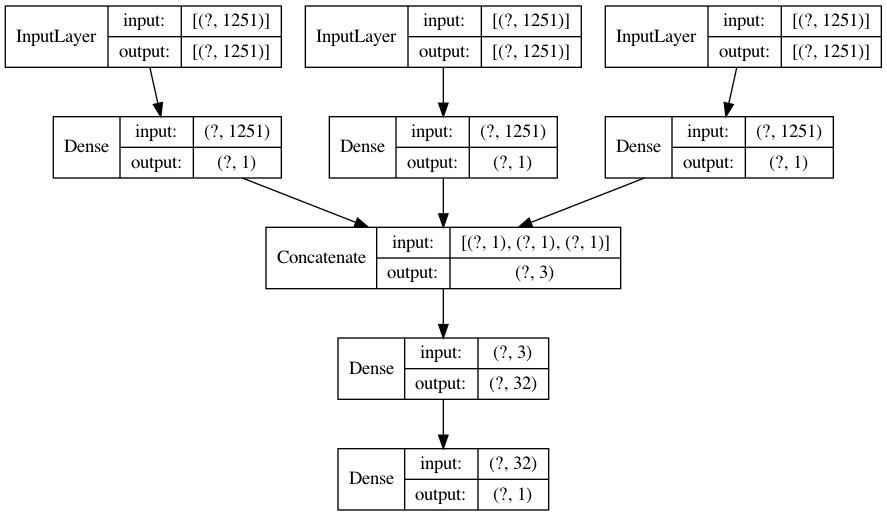

In [4]:
#単純モデル
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,))
input2 = Input(shape=(1251,))
input3 = Input(shape=(1251,))

# 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Dense(1, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Dense(1, activation="linear")(input3)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
w = Dense(32, activation="tanh")(combined)
w = Dense(1, activation="linear")(w)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input, z.input], outputs=w)
model.compile(loss='mse', optimizer='adam', metrics=['acc'])
model.summary()
plot_model(model, show_shapes=True, show_layer_names=False)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1251, 32)     128         input_1[0][0]                    
____________________________________________________________________________________________

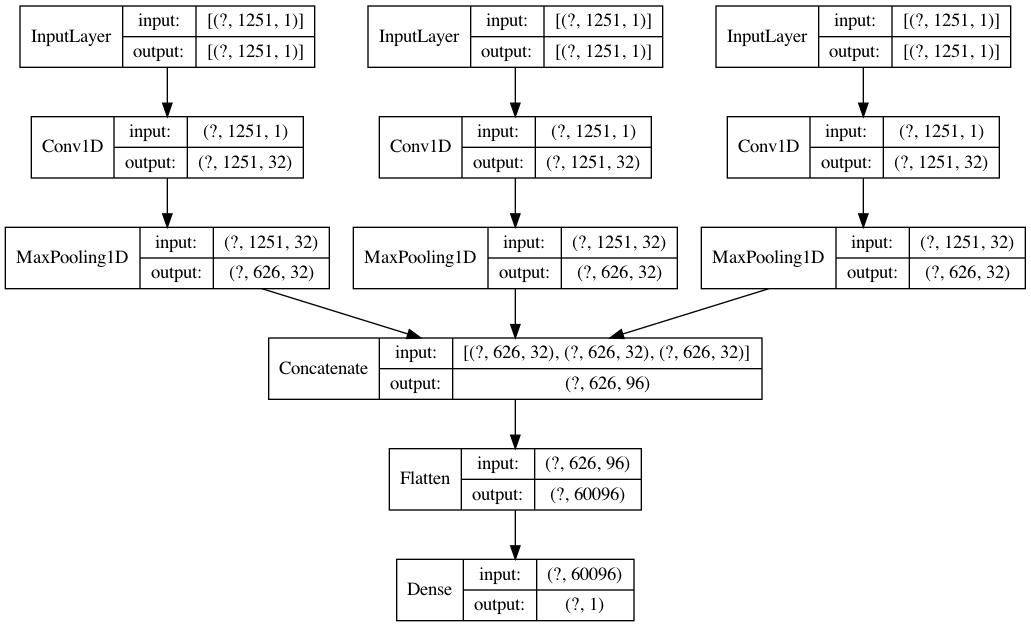

In [6]:
# CNNモデルで大きさ推定
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(1, activation="linear")(cnn)

# モデル定義とコンパイル
cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_size_model.summary()
plot_model(cnn_size_model, show_shapes=True, show_layer_names=False)

In [ ]:
size_history = cnn_size_model.fit([size_x_train1, size_x_train2, size_x_train3], size_y_train, epochs=10000, validation_data=([size_x_test1,size_x_test2,size_x_test3], size_y_test))

Epoch 1/10000
76/76 [==============================] - 3s 36ms/step - loss: 2.5322 - acc: 0.2075 - val_loss: 2.0579 - val_acc: 0.2074
Epoch 2/10000
76/76 [==============================] - 2s 33ms/step - loss: 1.9593 - acc: 0.2145 - val_loss: 1.9222 - val_acc: 0.2074
Epoch 3/10000
76/76 [==============================] - 3s 34ms/step - loss: 1.9327 - acc: 0.2145 - val_loss: 2.0496 - val_acc: 0.2074
Epoch 4/10000
76/76 [==============================] - 3s 34ms/step - loss: 1.8831 - acc: 0.2145 - val_loss: 1.8302 - val_acc: 0.2074
Epoch 5/10000
76/76 [==============================] - 3s 45ms/step - loss: 1.8443 - acc: 0.2145 - val_loss: 1.7964 - val_acc: 0.2074
Epoch 6/10000
76/76 [==============================] - 3s 34ms/step - loss: 1.8365 - acc: 0.2145 - val_loss: 1.8286 - val_acc: 0.2074
Epoch 7/10000
76/76 [==============================] - 3s 35ms/step - loss: 1.7587 - acc: 0.2145 - val_loss: 1.7297 - val_acc: 0.2074
Epoch 8/10000
76/76 [==============================] - 3s 34ms

Epoch 62/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.9692 - acc: 0.2145 - val_loss: 1.0354 - val_acc: 0.2074
Epoch 63/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.9814 - acc: 0.2145 - val_loss: 1.0217 - val_acc: 0.2074
Epoch 64/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.9611 - acc: 0.2145 - val_loss: 1.0127 - val_acc: 0.2074
Epoch 65/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.9400 - acc: 0.2145 - val_loss: 1.0043 - val_acc: 0.2074
Epoch 66/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.9479 - acc: 0.2145 - val_loss: 1.0168 - val_acc: 0.2074
Epoch 67/10000
76/76 [==============================] - 3s 35ms/step - loss: 1.2934 - acc: 0.2145 - val_loss: 2.2919 - val_acc: 0.2074
Epoch 68/10000
76/76 [==============================] - 3s 34ms/step - loss: 1.0631 - acc: 0.2145 - val_loss: 1.0541 - val_acc: 0.2074
Epoch 69/10000
76/76 [==============================] -

76/76 [==============================] - 4s 47ms/step - loss: 0.8161 - acc: 0.2145 - val_loss: 0.8816 - val_acc: 0.2074
Epoch 123/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.7833 - acc: 0.2141 - val_loss: 0.8832 - val_acc: 0.2037
Epoch 124/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.7744 - acc: 0.2145 - val_loss: 0.8933 - val_acc: 0.2037
Epoch 125/10000
76/76 [==============================] - 4s 50ms/step - loss: 0.7475 - acc: 0.2145 - val_loss: 1.0848 - val_acc: 0.2037
Epoch 126/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.7474 - acc: 0.2145 - val_loss: 0.8968 - val_acc: 0.2074
Epoch 127/10000
76/76 [==============================] - 3s 45ms/step - loss: 0.7441 - acc: 0.2145 - val_loss: 0.8938 - val_acc: 0.2037
Epoch 128/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.7723 - acc: 0.2145 - val_loss: 0.8718 - val_acc: 0.2037
Epoch 129/10000
76/76 [==============================] - 3s 39ms

76/76 [==============================] - 3s 46ms/step - loss: 0.7072 - acc: 0.2141 - val_loss: 0.8509 - val_acc: 0.2037
Epoch 183/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.8049 - acc: 0.2137 - val_loss: 0.9559 - val_acc: 0.2037
Epoch 184/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.9091 - acc: 0.2145 - val_loss: 1.0044 - val_acc: 0.2037
Epoch 185/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.7508 - acc: 0.2137 - val_loss: 0.8116 - val_acc: 0.2037
Epoch 186/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.7464 - acc: 0.2141 - val_loss: 0.8544 - val_acc: 0.2037
Epoch 187/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.6888 - acc: 0.2145 - val_loss: 0.8403 - val_acc: 0.2037
Epoch 188/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.7807 - acc: 0.2137 - val_loss: 0.8474 - val_acc: 0.2037
Epoch 189/10000
76/76 [==============================] - 3s 33ms

76/76 [==============================] - 3s 39ms/step - loss: 0.6205 - acc: 0.2141 - val_loss: 0.8032 - val_acc: 0.2037
Epoch 243/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.6482 - acc: 0.2137 - val_loss: 0.8778 - val_acc: 0.2037
Epoch 244/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.6296 - acc: 0.2141 - val_loss: 0.7665 - val_acc: 0.2037
Epoch 245/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.6358 - acc: 0.2141 - val_loss: 0.9540 - val_acc: 0.2037
Epoch 246/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.6228 - acc: 0.2141 - val_loss: 0.8793 - val_acc: 0.2037
Epoch 247/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.6061 - acc: 0.2137 - val_loss: 0.8033 - val_acc: 0.2037
Epoch 248/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.6567 - acc: 0.2141 - val_loss: 0.7915 - val_acc: 0.2037
Epoch 249/10000
76/76 [==============================] - 3s 38ms

76/76 [==============================] - 3s 40ms/step - loss: 0.5902 - acc: 0.2137 - val_loss: 0.7675 - val_acc: 0.2037
Epoch 303/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5986 - acc: 0.2133 - val_loss: 0.9117 - val_acc: 0.2037
Epoch 304/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.6442 - acc: 0.2129 - val_loss: 0.7433 - val_acc: 0.2037
Epoch 305/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.6124 - acc: 0.2141 - val_loss: 0.7748 - val_acc: 0.2037
Epoch 306/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.6285 - acc: 0.2137 - val_loss: 0.7511 - val_acc: 0.2037
Epoch 307/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.6087 - acc: 0.2141 - val_loss: 0.7525 - val_acc: 0.2037
Epoch 308/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.6306 - acc: 0.2141 - val_loss: 0.7166 - val_acc: 0.2037
Epoch 309/10000
76/76 [==============================] - 4s 48ms

76/76 [==============================] - 3s 35ms/step - loss: 0.6592 - acc: 0.2137 - val_loss: 0.7147 - val_acc: 0.2037
Epoch 363/10000
76/76 [==============================] - 3s 45ms/step - loss: 0.7094 - acc: 0.2137 - val_loss: 0.8872 - val_acc: 0.2037
Epoch 364/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.6179 - acc: 0.2129 - val_loss: 0.6900 - val_acc: 0.2037
Epoch 365/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.6181 - acc: 0.2137 - val_loss: 0.7133 - val_acc: 0.2037
Epoch 366/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.5491 - acc: 0.2141 - val_loss: 0.7226 - val_acc: 0.2037
Epoch 367/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.5805 - acc: 0.2133 - val_loss: 0.7194 - val_acc: 0.2037
Epoch 368/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.5715 - acc: 0.2129 - val_loss: 0.6964 - val_acc: 0.2037
Epoch 369/10000
76/76 [==============================] - 3s 34ms

76/76 [==============================] - 3s 34ms/step - loss: 0.5509 - acc: 0.2137 - val_loss: 0.6728 - val_acc: 0.2037
Epoch 423/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5205 - acc: 0.2137 - val_loss: 0.7185 - val_acc: 0.2037
Epoch 424/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.5522 - acc: 0.2133 - val_loss: 0.7017 - val_acc: 0.2037
Epoch 425/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.6163 - acc: 0.2129 - val_loss: 0.6610 - val_acc: 0.2037
Epoch 426/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.5633 - acc: 0.2137 - val_loss: 0.7273 - val_acc: 0.2037
Epoch 427/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5619 - acc: 0.2133 - val_loss: 0.7354 - val_acc: 0.2037
Epoch 428/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.5834 - acc: 0.2137 - val_loss: 0.7718 - val_acc: 0.2037
Epoch 429/10000
76/76 [==============================] - 3s 35ms

76/76 [==============================] - 4s 53ms/step - loss: 0.5391 - acc: 0.2137 - val_loss: 0.6649 - val_acc: 0.2037
Epoch 483/10000
76/76 [==============================] - 5s 62ms/step - loss: 0.5053 - acc: 0.2133 - val_loss: 0.6499 - val_acc: 0.2037
Epoch 484/10000
76/76 [==============================] - 4s 58ms/step - loss: 0.5246 - acc: 0.2129 - val_loss: 0.7498 - val_acc: 0.2037
Epoch 485/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.5073 - acc: 0.2137 - val_loss: 0.6692 - val_acc: 0.2037
Epoch 486/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.5161 - acc: 0.2129 - val_loss: 0.6479 - val_acc: 0.2037
Epoch 487/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.5118 - acc: 0.2137 - val_loss: 0.6472 - val_acc: 0.2037
Epoch 488/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.5334 - acc: 0.2133 - val_loss: 0.6663 - val_acc: 0.2037
Epoch 489/10000
76/76 [==============================] - 3s 45ms

76/76 [==============================] - 3s 34ms/step - loss: 0.8368 - acc: 0.2129 - val_loss: 0.9184 - val_acc: 0.2037
Epoch 543/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.7150 - acc: 0.2133 - val_loss: 1.1505 - val_acc: 0.2000
Epoch 544/10000
76/76 [==============================] - 2s 32ms/step - loss: 0.6280 - acc: 0.2125 - val_loss: 0.7256 - val_acc: 0.2037
Epoch 545/10000
76/76 [==============================] - 2s 31ms/step - loss: 0.5364 - acc: 0.2129 - val_loss: 0.8395 - val_acc: 0.2037
Epoch 546/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.5211 - acc: 0.2133 - val_loss: 0.7539 - val_acc: 0.2037
Epoch 547/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5362 - acc: 0.2125 - val_loss: 0.6717 - val_acc: 0.2037
Epoch 548/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.5449 - acc: 0.2133 - val_loss: 0.7540 - val_acc: 0.2037
Epoch 549/10000
76/76 [==============================] - 3s 34ms

76/76 [==============================] - 3s 34ms/step - loss: 0.5021 - acc: 0.2137 - val_loss: 0.6602 - val_acc: 0.2037
Epoch 603/10000
76/76 [==============================] - 2s 33ms/step - loss: 0.5017 - acc: 0.2133 - val_loss: 0.7089 - val_acc: 0.2037
Epoch 604/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.5098 - acc: 0.2129 - val_loss: 0.6233 - val_acc: 0.2037
Epoch 605/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.5000 - acc: 0.2129 - val_loss: 0.6253 - val_acc: 0.2037
Epoch 606/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.5246 - acc: 0.2137 - val_loss: 0.6312 - val_acc: 0.2037
Epoch 607/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4987 - acc: 0.2129 - val_loss: 0.6167 - val_acc: 0.2037
Epoch 608/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.5176 - acc: 0.2133 - val_loss: 0.6430 - val_acc: 0.2037
Epoch 609/10000
76/76 [==============================] - 2s 33ms

76/76 [==============================] - 3s 34ms/step - loss: 0.4917 - acc: 0.2125 - val_loss: 0.6486 - val_acc: 0.2037
Epoch 663/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5194 - acc: 0.2129 - val_loss: 0.6484 - val_acc: 0.2037
Epoch 664/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.5772 - acc: 0.2133 - val_loss: 0.7351 - val_acc: 0.2037
Epoch 665/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.6208 - acc: 0.2137 - val_loss: 0.6508 - val_acc: 0.2037
Epoch 666/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5287 - acc: 0.2125 - val_loss: 0.6261 - val_acc: 0.2037
Epoch 667/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.6253 - acc: 0.2125 - val_loss: 0.6392 - val_acc: 0.2037
Epoch 668/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.6018 - acc: 0.2129 - val_loss: 0.6978 - val_acc: 0.2037
Epoch 669/10000
76/76 [==============================] - 3s 37ms

76/76 [==============================] - 4s 46ms/step - loss: 0.4862 - acc: 0.2133 - val_loss: 0.6082 - val_acc: 0.2037
Epoch 723/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4814 - acc: 0.2129 - val_loss: 0.5990 - val_acc: 0.2037
Epoch 724/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4746 - acc: 0.2129 - val_loss: 0.5981 - val_acc: 0.2037
Epoch 725/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4787 - acc: 0.2129 - val_loss: 0.6181 - val_acc: 0.2037
Epoch 726/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5480 - acc: 0.2125 - val_loss: 0.6036 - val_acc: 0.2037
Epoch 727/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4964 - acc: 0.2133 - val_loss: 0.6043 - val_acc: 0.2037
Epoch 728/10000
76/76 [==============================] - 3s 33ms/step - loss: 0.4710 - acc: 0.2129 - val_loss: 0.6976 - val_acc: 0.2037
Epoch 729/10000
76/76 [==============================] - 3s 34ms

76/76 [==============================] - 3s 37ms/step - loss: 0.7322 - acc: 0.2125 - val_loss: 0.5731 - val_acc: 0.2037
Epoch 783/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4730 - acc: 0.2129 - val_loss: 0.6035 - val_acc: 0.2037
Epoch 784/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.5117 - acc: 0.2120 - val_loss: 0.5991 - val_acc: 0.2037
Epoch 785/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4576 - acc: 0.2125 - val_loss: 0.6435 - val_acc: 0.2037
Epoch 786/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.5113 - acc: 0.2129 - val_loss: 0.6384 - val_acc: 0.2037
Epoch 787/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.4952 - acc: 0.2120 - val_loss: 0.6604 - val_acc: 0.2037
Epoch 788/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5591 - acc: 0.2120 - val_loss: 0.6574 - val_acc: 0.2037
Epoch 789/10000
76/76 [==============================] - 3s 43ms

76/76 [==============================] - 3s 36ms/step - loss: 0.6021 - acc: 0.2129 - val_loss: 0.6173 - val_acc: 0.2037
Epoch 843/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.7265 - acc: 0.2133 - val_loss: 0.7423 - val_acc: 0.2037
Epoch 844/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.6014 - acc: 0.2125 - val_loss: 0.7635 - val_acc: 0.2037
Epoch 845/10000
76/76 [==============================] - 3s 40ms/step - loss: 1.1641 - acc: 0.2120 - val_loss: 0.6575 - val_acc: 0.2037
Epoch 846/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.5081 - acc: 0.2129 - val_loss: 0.5807 - val_acc: 0.2037
Epoch 847/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.5327 - acc: 0.2125 - val_loss: 0.6292 - val_acc: 0.2037
Epoch 848/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4554 - acc: 0.2120 - val_loss: 0.5836 - val_acc: 0.2037
Epoch 849/10000
76/76 [==============================] - 3s 39ms

76/76 [==============================] - 3s 42ms/step - loss: 0.5627 - acc: 0.2125 - val_loss: 0.6073 - val_acc: 0.2037
Epoch 903/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.6574 - acc: 0.2137 - val_loss: 0.6089 - val_acc: 0.2037
Epoch 904/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.5737 - acc: 0.2120 - val_loss: 0.6584 - val_acc: 0.2037
Epoch 905/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.5738 - acc: 0.2120 - val_loss: 0.6100 - val_acc: 0.2037
Epoch 906/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4746 - acc: 0.2129 - val_loss: 0.7333 - val_acc: 0.2000
Epoch 907/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4792 - acc: 0.2116 - val_loss: 0.5668 - val_acc: 0.2037
Epoch 908/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4777 - acc: 0.2125 - val_loss: 0.5917 - val_acc: 0.2037
Epoch 909/10000
76/76 [==============================] - 3s 40ms

76/76 [==============================] - 3s 35ms/step - loss: 0.4373 - acc: 0.2120 - val_loss: 0.6467 - val_acc: 0.2037
Epoch 963/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4455 - acc: 0.2125 - val_loss: 0.5680 - val_acc: 0.2037
Epoch 964/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4809 - acc: 0.2120 - val_loss: 0.9336 - val_acc: 0.2037
Epoch 965/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4602 - acc: 0.2133 - val_loss: 0.6011 - val_acc: 0.2037
Epoch 966/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4462 - acc: 0.2125 - val_loss: 0.5816 - val_acc: 0.2037
Epoch 967/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4458 - acc: 0.2133 - val_loss: 0.5715 - val_acc: 0.2037
Epoch 968/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4461 - acc: 0.2120 - val_loss: 0.5714 - val_acc: 0.2037
Epoch 969/10000
76/76 [==============================] - 3s 35ms

76/76 [==============================] - 3s 45ms/step - loss: 0.4625 - acc: 0.2129 - val_loss: 0.5889 - val_acc: 0.2037
Epoch 1023/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.5071 - acc: 0.2137 - val_loss: 0.5642 - val_acc: 0.2037
Epoch 1024/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4593 - acc: 0.2129 - val_loss: 0.5610 - val_acc: 0.2037
Epoch 1025/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.4415 - acc: 0.2129 - val_loss: 0.5589 - val_acc: 0.2037
Epoch 1026/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4651 - acc: 0.2120 - val_loss: 0.7049 - val_acc: 0.2000
Epoch 1027/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4316 - acc: 0.2125 - val_loss: 0.5883 - val_acc: 0.2037
Epoch 1028/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4453 - acc: 0.2125 - val_loss: 0.5594 - val_acc: 0.2037
Epoch 1029/10000
76/76 [==============================] - 

76/76 [==============================] - 3s 37ms/step - loss: 0.4727 - acc: 0.2125 - val_loss: 0.6336 - val_acc: 0.2037
Epoch 1082/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4837 - acc: 0.2125 - val_loss: 0.5759 - val_acc: 0.2037
Epoch 1083/10000
76/76 [==============================] - 3s 42ms/step - loss: 0.4420 - acc: 0.2116 - val_loss: 0.5549 - val_acc: 0.2037
Epoch 1084/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4680 - acc: 0.2125 - val_loss: 0.5652 - val_acc: 0.2037
Epoch 1085/10000
76/76 [==============================] - 3s 43ms/step - loss: 0.4652 - acc: 0.2129 - val_loss: 0.5648 - val_acc: 0.2037
Epoch 1086/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4350 - acc: 0.2120 - val_loss: 0.5657 - val_acc: 0.2037
Epoch 1087/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.4380 - acc: 0.2120 - val_loss: 0.7647 - val_acc: 0.2000
Epoch 1088/10000
76/76 [==============================] - 

76/76 [==============================] - 3s 40ms/step - loss: 0.4346 - acc: 0.2125 - val_loss: 0.5709 - val_acc: 0.2037
Epoch 1141/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4999 - acc: 0.2120 - val_loss: 0.5583 - val_acc: 0.2037
Epoch 1142/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.4329 - acc: 0.2120 - val_loss: 0.5873 - val_acc: 0.2037
Epoch 1143/10000
76/76 [==============================] - 3s 45ms/step - loss: 0.4455 - acc: 0.2120 - val_loss: 0.6420 - val_acc: 0.2037
Epoch 1144/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4645 - acc: 0.2125 - val_loss: 0.5714 - val_acc: 0.2037
Epoch 1145/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4841 - acc: 0.2108 - val_loss: 0.5937 - val_acc: 0.2037
Epoch 1146/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4362 - acc: 0.2125 - val_loss: 0.5661 - val_acc: 0.2037
Epoch 1147/10000
76/76 [==============================] - 

Epoch 1200/10000
76/76 [==============================] - 3s 45ms/step - loss: 0.4644 - acc: 0.2120 - val_loss: 0.6479 - val_acc: 0.2000
Epoch 1201/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4781 - acc: 0.2125 - val_loss: 0.5608 - val_acc: 0.2037
Epoch 1202/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.4483 - acc: 0.2129 - val_loss: 0.5621 - val_acc: 0.2037
Epoch 1203/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4874 - acc: 0.2129 - val_loss: 0.5942 - val_acc: 0.2037
Epoch 1204/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.9143 - acc: 0.2116 - val_loss: 0.7643 - val_acc: 0.2037
Epoch 1205/10000
76/76 [==============================] - 3s 34ms/step - loss: 0.6052 - acc: 0.2125 - val_loss: 1.0410 - val_acc: 0.2000
Epoch 1206/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.6821 - acc: 0.2112 - val_loss: 0.5521 - val_acc: 0.2037
Epoch 1207/10000
76/76 [=================

Epoch 1260/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4328 - acc: 0.2120 - val_loss: 0.6779 - val_acc: 0.2000
Epoch 1261/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4655 - acc: 0.2120 - val_loss: 0.5914 - val_acc: 0.2037
Epoch 1262/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4699 - acc: 0.2120 - val_loss: 0.6904 - val_acc: 0.2037
Epoch 1263/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4438 - acc: 0.2120 - val_loss: 0.6835 - val_acc: 0.2000
Epoch 1264/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4484 - acc: 0.2125 - val_loss: 0.5822 - val_acc: 0.2037
Epoch 1265/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4575 - acc: 0.2112 - val_loss: 0.5650 - val_acc: 0.2037
Epoch 1266/10000
76/76 [==============================] - 3s 37ms/step - loss: 0.4586 - acc: 0.2129 - val_loss: 0.5642 - val_acc: 0.2037
Epoch 1267/10000
76/76 [=================

Epoch 1320/10000
76/76 [==============================] - 3s 36ms/step - loss: 0.4433 - acc: 0.2125 - val_loss: 0.5533 - val_acc: 0.2037
Epoch 1321/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.4659 - acc: 0.2125 - val_loss: 0.6402 - val_acc: 0.2037
Epoch 1322/10000
76/76 [==============================] - 4s 54ms/step - loss: 0.4391 - acc: 0.2129 - val_loss: 0.5925 - val_acc: 0.2037
Epoch 1323/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4630 - acc: 0.2120 - val_loss: 0.5647 - val_acc: 0.2037
Epoch 1324/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4593 - acc: 0.2129 - val_loss: 0.5829 - val_acc: 0.2037
Epoch 1325/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.5084 - acc: 0.2129 - val_loss: 0.5773 - val_acc: 0.2037
Epoch 1326/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4670 - acc: 0.2125 - val_loss: 0.5316 - val_acc: 0.2037
Epoch 1327/10000
76/76 [=================

Epoch 1380/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5454 - acc: 0.2120 - val_loss: 0.5296 - val_acc: 0.2037
Epoch 1381/10000
76/76 [==============================] - 3s 39ms/step - loss: 0.4437 - acc: 0.2120 - val_loss: 0.5730 - val_acc: 0.2037
Epoch 1382/10000
76/76 [==============================] - 4s 49ms/step - loss: 0.6126 - acc: 0.2125 - val_loss: 0.7178 - val_acc: 0.2000
Epoch 1383/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.4604 - acc: 0.2129 - val_loss: 0.5562 - val_acc: 0.2037
Epoch 1384/10000
76/76 [==============================] - 4s 48ms/step - loss: 0.4311 - acc: 0.2125 - val_loss: 0.5866 - val_acc: 0.2037
Epoch 1385/10000
76/76 [==============================] - 4s 47ms/step - loss: 0.5347 - acc: 0.2120 - val_loss: 0.8657 - val_acc: 0.2037
Epoch 1386/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.5711 - acc: 0.2129 - val_loss: 0.5493 - val_acc: 0.2037
Epoch 1387/10000
76/76 [=================

Epoch 1440/10000
76/76 [==============================] - 4s 50ms/step - loss: 0.4426 - acc: 0.2129 - val_loss: 0.5783 - val_acc: 0.2037
Epoch 1441/10000
76/76 [==============================] - 3s 44ms/step - loss: 0.4401 - acc: 0.2116 - val_loss: 0.5800 - val_acc: 0.2037
Epoch 1442/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.4142 - acc: 0.2125 - val_loss: 0.5650 - val_acc: 0.2037
Epoch 1443/10000
76/76 [==============================] - 3s 40ms/step - loss: 0.4582 - acc: 0.2129 - val_loss: 1.1713 - val_acc: 0.1963
Epoch 1444/10000
76/76 [==============================] - 3s 41ms/step - loss: 0.5060 - acc: 0.2112 - val_loss: 0.5578 - val_acc: 0.2037
Epoch 1445/10000
76/76 [==============================] - 3s 38ms/step - loss: 0.4549 - acc: 0.2125 - val_loss: 0.6421 - val_acc: 0.2000
Epoch 1446/10000
76/76 [==============================] - 3s 35ms/step - loss: 0.6886 - acc: 0.2100 - val_loss: 0.5517 - val_acc: 0.2037
Epoch 1447/10000
76/76 [=================

In [ ]:
# モデルの評価(大きさ)
score = cnn_size_model.evaluate([size_x_test1, size_x_test2, size_x_test3], size_y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# 学習経過の可視化(大きさ)
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 散布図表示
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test

plt.scatter(size_answer, size_predict)
plt.xlabel("欠陥の大きさ")
plt.ylabel("推定した欠陥の大きさ")
plt.grid(True)
## y=xの直線をひく
x = []
for i in range(60):
    x.append(i*0.1)
y = []
for i in range(60):
    y.append(i*60)
plt.plot(x, y, color='black')
## 誤差-20%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*0.8)
plt.plot(x, y, color='red')
## 誤差+20%の直線を引く
y = []
for i in range(60):
    y.append(i*0.1*1.2)
plt.plot(x, y, color='red')

In [10]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.058333333333333334
大きさ2の正答率：0.45614035087719296
大きさ3の正答率：0.6568627450980392
大きさ4の正答率：0.9230769230769231
大きさ5の正答率：0.6868686868686869


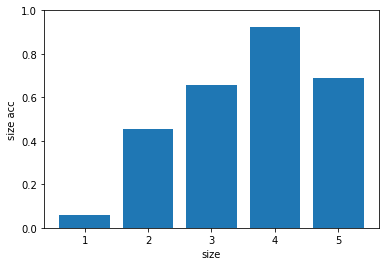

In [11]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [12]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.8083333333333333
大きさ2の正答率：0.7017543859649122
大きさ3の正答率：0.5098039215686274
大きさ4の正答率：0.75
大きさ5の正答率：0.37373737373737376


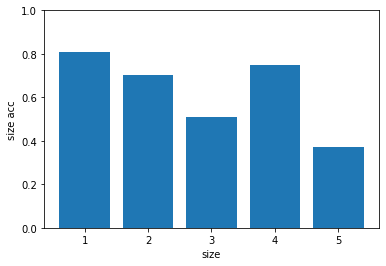

In [13]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [14]:
one_predict = []
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
for i in range(len(size_y_test)):
    if size_answer[i] == 1:
        one_predict.append(size_predict[i][0])
print(one_predict)

[1.44252, 1.1473302, 1.4547509, 1.1462659, 1.279724, 1.4187611, 2.2494783, 1.4151858, 1.5425566, 1.3619479, 1.5114468, 1.3730124, 1.5752915, 1.4545077, 1.3821934, 1.5695113, 1.2814149, 1.4333647, 1.567007, 0.73064697, 1.4592646, 1.4466609, 1.4385337, 1.4378985, 1.4328555, 1.4320906, 0.7976588, 1.4148434, 1.4687041, 1.396653, 1.4211091, 1.3610276, 1.4213666, 1.3046511, 1.4013566, 1.1810225, 1.3877333, 1.4635714, 1.4398497, 1.4356498, 1.4115142, 1.435707, 1.3438138, 1.2059973, 1.4960641, 1.4183291, 1.4417571, 1.4593323, 1.3119601, 1.3960971, 1.4772471, 1.5889014, 1.4211463, 1.4654015, 1.5327939, 1.4758557, 1.3323001, 1.4968585, 1.5920066, 1.5640067, 1.3928717, 1.4473618, 1.6459101, 1.461213, 1.4432524, 0.48839843, 1.4031609, 1.4343623, 1.4961585, 1.5364636, 1.4618129, 1.2368821, 1.4010838, 1.2895831, 1.4371518, 1.4584311, 1.4902104, 1.60155, 1.2386817, 1.3893145, 1.4438361, 1.4162654, 1.4688128, 1.4389266, 1.501458, 1.0119036, 1.5519599, 1.4248704, 1.4687833, 1.4215535, 1.7420453, 1.4437

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1251, 1)]    0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1251, 32)     128         input_1[0][0]                    
____________________________________________________________________________________________

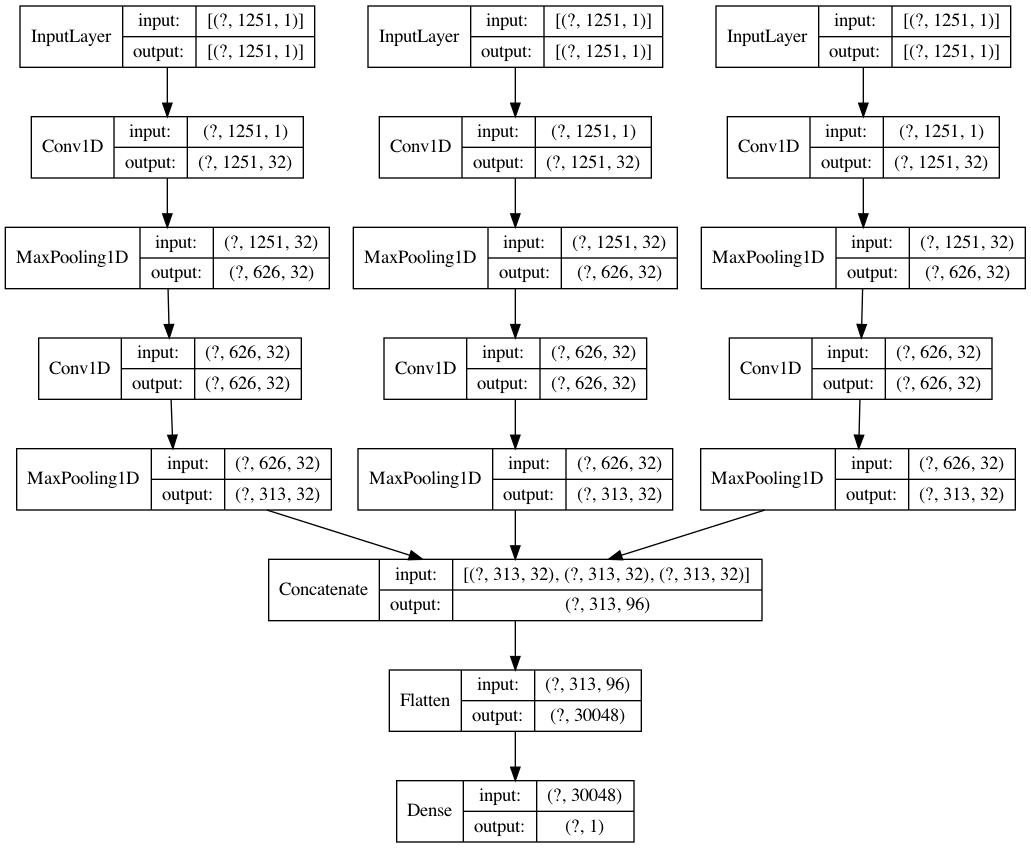

In [4]:
# CNNモデルで大きさ推定(層を増やす)
# import
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model

# 入力を定義
input1 = Input(shape=(1251,1))
input2 = Input(shape=(1251,1))
input3 = Input(shape=(1251,1))

# 入力1から結合前まで
x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(32, 3, padding='same', activation='tanh')(x)
x = MaxPooling1D(2, padding='same')(x)
x = Model(inputs=input1, outputs=x)
# 入力2から結合前まで
y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
y = MaxPooling1D(2, padding='same')(y)
y = Conv1D(32, 3, padding='same', activation='tanh')(y)
y = MaxPooling1D(2, padding='same')(y)
y = Model(inputs=input2, outputs=y)
# 入力3から結合前まで
z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
z = MaxPooling1D(2, padding='same')(z)
z = Conv1D(32, 3, padding='same', activation='tanh')(z)
z = MaxPooling1D(2, padding='same')(z)
z = Model(inputs=input3, outputs=z)

# 結合
combined = concatenate([x.output, y.output, z.output])

# 密結合
cnn = Flatten()(combined)
cnn = Dense(1, activation="linear")(cnn)

# モデル定義とコンパイル
cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
cnn_size_model.summary()
plot_model(cnn_size_model, show_shapes=True, show_layer_names=False)

In [6]:
size_history = cnn_size_model.fit([size_x_train1, size_x_train2, size_x_train3], size_y_train, epochs=4000, validation_data=([size_x_test1,size_x_test2,size_x_test3], size_y_test))

Epoch 1/4000
68/68 [==============================] - 4s 64ms/step - loss: 1.9712 - acc: 0.2172 - val_loss: 1.9494 - val_acc: 0.2004
Epoch 2/4000
68/68 [==============================] - 4s 60ms/step - loss: 1.9611 - acc: 0.2172 - val_loss: 1.9221 - val_acc: 0.2004
Epoch 3/4000
68/68 [==============================] - 4s 60ms/step - loss: 1.9368 - acc: 0.2172 - val_loss: 1.8511 - val_acc: 0.2004
Epoch 4/4000
68/68 [==============================] - 4s 62ms/step - loss: 1.8238 - acc: 0.2172 - val_loss: 1.7745 - val_acc: 0.2004
Epoch 5/4000
68/68 [==============================] - 4s 61ms/step - loss: 1.7258 - acc: 0.2172 - val_loss: 1.7579 - val_acc: 0.2004
Epoch 6/4000
68/68 [==============================] - 4s 64ms/step - loss: 1.7605 - acc: 0.2172 - val_loss: 1.9649 - val_acc: 0.2004
Epoch 7/4000
68/68 [==============================] - 4s 62ms/step - loss: 1.7141 - acc: 0.2172 - val_loss: 1.7147 - val_acc: 0.2004
Epoch 8/4000
68/68 [==============================] - 5s 67ms/step - 

68/68 [==============================] - 4s 63ms/step - loss: 0.9350 - acc: 0.2162 - val_loss: 0.9978 - val_acc: 0.2004
Epoch 124/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.8806 - acc: 0.2162 - val_loss: 0.8940 - val_acc: 0.2004
Epoch 125/4000
68/68 [==============================] - 4s 65ms/step - loss: 1.1510 - acc: 0.2167 - val_loss: 0.8955 - val_acc: 0.2004
Epoch 126/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.7568 - acc: 0.2167 - val_loss: 0.9166 - val_acc: 0.2004
Epoch 127/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.7135 - acc: 0.2167 - val_loss: 0.8179 - val_acc: 0.2004
Epoch 128/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.6569 - acc: 0.2162 - val_loss: 0.9375 - val_acc: 0.2004
Epoch 129/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.6703 - acc: 0.2162 - val_loss: 0.8611 - val_acc: 0.2004
Epoch 130/4000
68/68 [==============================] - 4s 64ms/step -

Epoch 184/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5378 - acc: 0.2148 - val_loss: 0.8351 - val_acc: 0.2004
Epoch 185/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.5264 - acc: 0.2153 - val_loss: 0.7978 - val_acc: 0.2004
Epoch 186/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5612 - acc: 0.2153 - val_loss: 0.7622 - val_acc: 0.2004
Epoch 187/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5767 - acc: 0.2153 - val_loss: 1.0635 - val_acc: 0.1985
Epoch 188/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.5889 - acc: 0.2144 - val_loss: 0.7787 - val_acc: 0.2004
Epoch 189/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.5276 - acc: 0.2158 - val_loss: 0.7650 - val_acc: 0.2004
Epoch 190/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5279 - acc: 0.2148 - val_loss: 0.8949 - val_acc: 0.2004
Epoch 191/4000
68/68 [==============================] -

Epoch 245/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4798 - acc: 0.2153 - val_loss: 0.7586 - val_acc: 0.2004
Epoch 246/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4772 - acc: 0.2148 - val_loss: 0.8943 - val_acc: 0.2004
Epoch 247/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.4892 - acc: 0.2144 - val_loss: 0.7604 - val_acc: 0.2004
Epoch 248/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4726 - acc: 0.2148 - val_loss: 0.8495 - val_acc: 0.2004
Epoch 249/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4654 - acc: 0.2148 - val_loss: 0.7805 - val_acc: 0.2004
Epoch 250/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4567 - acc: 0.2148 - val_loss: 0.9075 - val_acc: 0.2004
Epoch 251/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.5014 - acc: 0.2148 - val_loss: 0.8294 - val_acc: 0.2004
Epoch 252/4000
68/68 [==============================] -

Epoch 306/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4309 - acc: 0.2144 - val_loss: 0.7286 - val_acc: 0.2004
Epoch 307/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4953 - acc: 0.2144 - val_loss: 0.8158 - val_acc: 0.2004
Epoch 308/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.4859 - acc: 0.2139 - val_loss: 0.8647 - val_acc: 0.1985
Epoch 309/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4352 - acc: 0.2144 - val_loss: 0.8145 - val_acc: 0.2004
Epoch 310/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.4316 - acc: 0.2144 - val_loss: 0.8731 - val_acc: 0.2004
Epoch 311/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4249 - acc: 0.2148 - val_loss: 0.8800 - val_acc: 0.2004
Epoch 312/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.4374 - acc: 0.2153 - val_loss: 0.8427 - val_acc: 0.2004
Epoch 313/4000
68/68 [==============================] -

Epoch 367/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.4217 - acc: 0.2139 - val_loss: 0.7729 - val_acc: 0.2004
Epoch 368/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3804 - acc: 0.2144 - val_loss: 0.7984 - val_acc: 0.2004
Epoch 369/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.4038 - acc: 0.2148 - val_loss: 0.7856 - val_acc: 0.2004
Epoch 370/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3857 - acc: 0.2153 - val_loss: 0.8648 - val_acc: 0.2004
Epoch 371/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4260 - acc: 0.2148 - val_loss: 0.9972 - val_acc: 0.2004
Epoch 372/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4525 - acc: 0.2135 - val_loss: 0.8863 - val_acc: 0.2004
Epoch 373/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4089 - acc: 0.2144 - val_loss: 0.8392 - val_acc: 0.2004
Epoch 374/4000
68/68 [==============================] -

Epoch 428/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3606 - acc: 0.2139 - val_loss: 0.9401 - val_acc: 0.1985
Epoch 429/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4619 - acc: 0.2144 - val_loss: 0.8976 - val_acc: 0.2004
Epoch 430/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.6286 - acc: 0.2144 - val_loss: 0.8928 - val_acc: 0.1985
Epoch 431/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.9151 - acc: 0.2139 - val_loss: 1.3437 - val_acc: 0.2004
Epoch 432/4000
68/68 [==============================] - 4s 58ms/step - loss: 1.1105 - acc: 0.2107 - val_loss: 0.8755 - val_acc: 0.2004
Epoch 433/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.5649 - acc: 0.2162 - val_loss: 0.9790 - val_acc: 0.2004
Epoch 434/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.6566 - acc: 0.2144 - val_loss: 1.0227 - val_acc: 0.2004
Epoch 435/4000
68/68 [==============================] -

Epoch 489/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3539 - acc: 0.2148 - val_loss: 0.7684 - val_acc: 0.1985
Epoch 490/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3750 - acc: 0.2148 - val_loss: 0.8512 - val_acc: 0.1985
Epoch 491/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3476 - acc: 0.2153 - val_loss: 0.7866 - val_acc: 0.1985
Epoch 492/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.4326 - acc: 0.2135 - val_loss: 0.8629 - val_acc: 0.1985
Epoch 493/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3611 - acc: 0.2153 - val_loss: 0.7509 - val_acc: 0.2004
Epoch 494/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3377 - acc: 0.2148 - val_loss: 0.8514 - val_acc: 0.2004
Epoch 495/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3370 - acc: 0.2139 - val_loss: 0.8107 - val_acc: 0.1985
Epoch 496/4000
68/68 [==============================] -

Epoch 550/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3313 - acc: 0.2153 - val_loss: 0.7517 - val_acc: 0.2004
Epoch 551/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3240 - acc: 0.2139 - val_loss: 0.7899 - val_acc: 0.2004
Epoch 552/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3576 - acc: 0.2148 - val_loss: 0.9727 - val_acc: 0.1985
Epoch 553/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3194 - acc: 0.2158 - val_loss: 0.7633 - val_acc: 0.1985
Epoch 554/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3238 - acc: 0.2148 - val_loss: 0.7573 - val_acc: 0.2004
Epoch 555/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3322 - acc: 0.2153 - val_loss: 0.7606 - val_acc: 0.2004
Epoch 556/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3450 - acc: 0.2158 - val_loss: 0.9342 - val_acc: 0.1985
Epoch 557/4000
68/68 [==============================] -

Epoch 611/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3410 - acc: 0.2158 - val_loss: 0.7547 - val_acc: 0.1985
Epoch 612/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3092 - acc: 0.2153 - val_loss: 0.7789 - val_acc: 0.2004
Epoch 613/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3257 - acc: 0.2148 - val_loss: 0.7028 - val_acc: 0.2004
Epoch 614/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3228 - acc: 0.2158 - val_loss: 0.8936 - val_acc: 0.1985
Epoch 615/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3650 - acc: 0.2153 - val_loss: 0.8534 - val_acc: 0.2004
Epoch 616/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3546 - acc: 0.2153 - val_loss: 0.7420 - val_acc: 0.1985
Epoch 617/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3253 - acc: 0.2153 - val_loss: 0.8569 - val_acc: 0.1985
Epoch 618/4000
68/68 [==============================] -

Epoch 672/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3705 - acc: 0.2162 - val_loss: 0.6732 - val_acc: 0.2004
Epoch 673/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3189 - acc: 0.2148 - val_loss: 0.7796 - val_acc: 0.2004
Epoch 674/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3402 - acc: 0.2158 - val_loss: 0.7041 - val_acc: 0.2004
Epoch 675/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3258 - acc: 0.2153 - val_loss: 0.7779 - val_acc: 0.2004
Epoch 676/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3193 - acc: 0.2153 - val_loss: 0.7088 - val_acc: 0.1985
Epoch 677/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3143 - acc: 0.2153 - val_loss: 0.7358 - val_acc: 0.2004
Epoch 678/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.3069 - acc: 0.2158 - val_loss: 0.7660 - val_acc: 0.1985
Epoch 679/4000
68/68 [==============================] -

Epoch 733/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3090 - acc: 0.2158 - val_loss: 0.7644 - val_acc: 0.2004
Epoch 734/4000
68/68 [==============================] - 4s 57ms/step - loss: 0.3384 - acc: 0.2148 - val_loss: 1.0691 - val_acc: 0.1985
Epoch 735/4000
68/68 [==============================] - 4s 57ms/step - loss: 0.3348 - acc: 0.2158 - val_loss: 0.7171 - val_acc: 0.2004
Epoch 736/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3426 - acc: 0.2153 - val_loss: 0.8987 - val_acc: 0.2004
Epoch 737/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3562 - acc: 0.2153 - val_loss: 0.9226 - val_acc: 0.2004
Epoch 738/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3054 - acc: 0.2148 - val_loss: 0.8766 - val_acc: 0.1985
Epoch 739/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3021 - acc: 0.2153 - val_loss: 0.7801 - val_acc: 0.1985
Epoch 740/4000
68/68 [==============================] -

Epoch 794/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2965 - acc: 0.2153 - val_loss: 0.7198 - val_acc: 0.2004
Epoch 795/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2968 - acc: 0.2158 - val_loss: 0.6961 - val_acc: 0.1985
Epoch 796/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2869 - acc: 0.2158 - val_loss: 0.7834 - val_acc: 0.1985
Epoch 797/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3126 - acc: 0.2153 - val_loss: 0.7205 - val_acc: 0.2004
Epoch 798/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.3011 - acc: 0.2144 - val_loss: 0.7047 - val_acc: 0.2004
Epoch 799/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2932 - acc: 0.2153 - val_loss: 0.7418 - val_acc: 0.2004
Epoch 800/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2972 - acc: 0.2158 - val_loss: 0.7447 - val_acc: 0.1985
Epoch 801/4000
68/68 [==============================] -

Epoch 855/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2871 - acc: 0.2162 - val_loss: 0.6674 - val_acc: 0.1985
Epoch 856/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2902 - acc: 0.2162 - val_loss: 0.7628 - val_acc: 0.2004
Epoch 857/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3322 - acc: 0.2162 - val_loss: 0.8319 - val_acc: 0.2004
Epoch 858/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3039 - acc: 0.2153 - val_loss: 0.7401 - val_acc: 0.2004
Epoch 859/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3674 - acc: 0.2167 - val_loss: 0.8988 - val_acc: 0.2004
Epoch 860/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3917 - acc: 0.2162 - val_loss: 0.8970 - val_acc: 0.1985
Epoch 861/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.3519 - acc: 0.2148 - val_loss: 0.9967 - val_acc: 0.1985
Epoch 862/4000
68/68 [==============================] -

Epoch 916/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2926 - acc: 0.2162 - val_loss: 0.7996 - val_acc: 0.1985
Epoch 917/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3230 - acc: 0.2158 - val_loss: 0.7123 - val_acc: 0.1985
Epoch 918/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3300 - acc: 0.2153 - val_loss: 0.7136 - val_acc: 0.2004
Epoch 919/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2827 - acc: 0.2172 - val_loss: 0.8212 - val_acc: 0.1985
Epoch 920/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3247 - acc: 0.2153 - val_loss: 0.7307 - val_acc: 0.1985
Epoch 921/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2721 - acc: 0.2162 - val_loss: 0.7241 - val_acc: 0.1985
Epoch 922/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2758 - acc: 0.2162 - val_loss: 0.7126 - val_acc: 0.2004
Epoch 923/4000
68/68 [==============================] -

Epoch 977/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3455 - acc: 0.2153 - val_loss: 0.7059 - val_acc: 0.2004
Epoch 978/4000
68/68 [==============================] - 4s 63ms/step - loss: 0.2837 - acc: 0.2158 - val_loss: 0.7397 - val_acc: 0.1985
Epoch 979/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.3269 - acc: 0.2153 - val_loss: 0.9396 - val_acc: 0.1985
Epoch 980/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3137 - acc: 0.2153 - val_loss: 0.7299 - val_acc: 0.1985
Epoch 981/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3387 - acc: 0.2148 - val_loss: 0.7002 - val_acc: 0.2004
Epoch 982/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2752 - acc: 0.2153 - val_loss: 0.6693 - val_acc: 0.2004
Epoch 983/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2815 - acc: 0.2158 - val_loss: 0.7077 - val_acc: 0.2004
Epoch 984/4000
68/68 [==============================] -

68/68 [==============================] - 5s 66ms/step - loss: 0.2621 - acc: 0.2153 - val_loss: 0.7311 - val_acc: 0.2004
Epoch 1098/4000
68/68 [==============================] - 4s 66ms/step - loss: 0.3012 - acc: 0.2153 - val_loss: 0.6467 - val_acc: 0.2004
Epoch 1099/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3063 - acc: 0.2162 - val_loss: 0.6466 - val_acc: 0.1985
Epoch 1100/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3796 - acc: 0.2135 - val_loss: 0.7256 - val_acc: 0.2004
Epoch 1101/4000
68/68 [==============================] - 5s 73ms/step - loss: 0.3730 - acc: 0.2162 - val_loss: 0.6778 - val_acc: 0.2004
Epoch 1102/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2862 - acc: 0.2162 - val_loss: 0.6877 - val_acc: 0.1985
Epoch 1103/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2916 - acc: 0.2158 - val_loss: 0.6939 - val_acc: 0.2004
Epoch 1104/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2546 - acc: 0.2158 - val_loss: 0.6244 - val_acc: 0.2004
Epoch 1218/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2660 - acc: 0.2153 - val_loss: 0.6621 - val_acc: 0.1985
Epoch 1219/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2654 - acc: 0.2162 - val_loss: 0.6355 - val_acc: 0.1985
Epoch 1220/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2930 - acc: 0.2158 - val_loss: 0.7066 - val_acc: 0.2004
Epoch 1221/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2661 - acc: 0.2158 - val_loss: 0.6343 - val_acc: 0.2004
Epoch 1222/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2704 - acc: 0.2167 - val_loss: 0.7254 - val_acc: 0.2004
Epoch 1223/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2711 - acc: 0.2148 - val_loss: 0.7438 - val_acc: 0.1985
Epoch 1224/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2889 - acc: 0.2148 - val_loss: 0.6464 - val_acc: 0.2004
Epoch 1338/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2873 - acc: 0.2135 - val_loss: 0.6611 - val_acc: 0.2004
Epoch 1339/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2538 - acc: 0.2162 - val_loss: 0.8750 - val_acc: 0.2004
Epoch 1340/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2451 - acc: 0.2167 - val_loss: 0.6886 - val_acc: 0.2004
Epoch 1341/4000
68/68 [==============================] - 5s 69ms/step - loss: 0.2547 - acc: 0.2158 - val_loss: 0.6394 - val_acc: 0.2004
Epoch 1342/4000
68/68 [==============================] - 4s 65ms/step - loss: 0.2457 - acc: 0.2167 - val_loss: 0.7524 - val_acc: 0.1985
Epoch 1343/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2464 - acc: 0.2158 - val_loss: 0.6347 - val_acc: 0.1985
Epoch 1344/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2371 - acc: 0.2158 - val_loss: 0.6661 - val_acc: 0.2004
Epoch 1458/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2319 - acc: 0.2153 - val_loss: 0.6146 - val_acc: 0.2004
Epoch 1459/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2334 - acc: 0.2162 - val_loss: 0.6307 - val_acc: 0.2004
Epoch 1460/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2437 - acc: 0.2162 - val_loss: 0.8556 - val_acc: 0.1985
Epoch 1461/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2526 - acc: 0.2158 - val_loss: 0.7629 - val_acc: 0.1985
Epoch 1462/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2520 - acc: 0.2158 - val_loss: 0.6719 - val_acc: 0.2004
Epoch 1463/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2862 - acc: 0.2144 - val_loss: 0.6491 - val_acc: 0.2004
Epoch 1464/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 61ms/step - loss: 0.2836 - acc: 0.2158 - val_loss: 0.5991 - val_acc: 0.2004
Epoch 1578/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2340 - acc: 0.2158 - val_loss: 0.6419 - val_acc: 0.2004
Epoch 1579/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2314 - acc: 0.2158 - val_loss: 0.6564 - val_acc: 0.1985
Epoch 1580/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2353 - acc: 0.2153 - val_loss: 0.6312 - val_acc: 0.1985
Epoch 1581/4000
68/68 [==============================] - 5s 67ms/step - loss: 0.2329 - acc: 0.2167 - val_loss: 0.6396 - val_acc: 0.1985
Epoch 1582/4000
68/68 [==============================] - 5s 67ms/step - loss: 0.2220 - acc: 0.2158 - val_loss: 0.6846 - val_acc: 0.2004
Epoch 1583/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2416 - acc: 0.2158 - val_loss: 0.6275 - val_acc: 0.2004
Epoch 1584/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 60ms/step - loss: 0.2505 - acc: 0.2158 - val_loss: 0.6218 - val_acc: 0.1985
Epoch 1698/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2229 - acc: 0.2153 - val_loss: 0.6149 - val_acc: 0.2004
Epoch 1699/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2308 - acc: 0.2172 - val_loss: 0.6093 - val_acc: 0.2004
Epoch 1700/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2286 - acc: 0.2167 - val_loss: 0.7240 - val_acc: 0.1985
Epoch 1701/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2484 - acc: 0.2162 - val_loss: 0.6259 - val_acc: 0.2004
Epoch 1702/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2308 - acc: 0.2158 - val_loss: 0.6762 - val_acc: 0.2004
Epoch 1703/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2782 - acc: 0.2144 - val_loss: 0.6094 - val_acc: 0.2004
Epoch 1704/4000
68/68 [==============================] - 4s 62ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2259 - acc: 0.2158 - val_loss: 0.6479 - val_acc: 0.1985
Epoch 1818/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2224 - acc: 0.2153 - val_loss: 0.7493 - val_acc: 0.1985
Epoch 1819/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2430 - acc: 0.2162 - val_loss: 0.6115 - val_acc: 0.1985
Epoch 1820/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2417 - acc: 0.2144 - val_loss: 0.6371 - val_acc: 0.2004
Epoch 1821/4000
68/68 [==============================] - 5s 68ms/step - loss: 0.2255 - acc: 0.2158 - val_loss: 0.7031 - val_acc: 0.1985
Epoch 1822/4000
68/68 [==============================] - 4s 64ms/step - loss: 0.2450 - acc: 0.2167 - val_loss: 0.6470 - val_acc: 0.2004
Epoch 1823/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2179 - acc: 0.2158 - val_loss: 0.6592 - val_acc: 0.1985
Epoch 1824/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2110 - acc: 0.2162 - val_loss: 0.5694 - val_acc: 0.2004
Epoch 1938/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.2552 - acc: 0.2162 - val_loss: 0.6112 - val_acc: 0.2004
Epoch 1939/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.2415 - acc: 0.2153 - val_loss: 0.6000 - val_acc: 0.2004
Epoch 1940/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2470 - acc: 0.2148 - val_loss: 0.6405 - val_acc: 0.2004
Epoch 1941/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2201 - acc: 0.2162 - val_loss: 0.6180 - val_acc: 0.2004
Epoch 1942/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2100 - acc: 0.2162 - val_loss: 0.5761 - val_acc: 0.2004
Epoch 1943/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2078 - acc: 0.2153 - val_loss: 0.6256 - val_acc: 0.2004
Epoch 1944/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2102 - acc: 0.2158 - val_loss: 0.6091 - val_acc: 0.2004
Epoch 2058/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2150 - acc: 0.2158 - val_loss: 0.6272 - val_acc: 0.1985
Epoch 2059/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2199 - acc: 0.2158 - val_loss: 0.6360 - val_acc: 0.1985
Epoch 2060/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2371 - acc: 0.2144 - val_loss: 0.6829 - val_acc: 0.2004
Epoch 2061/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2174 - acc: 0.2153 - val_loss: 0.6705 - val_acc: 0.2004
Epoch 2062/4000
68/68 [==============================] - 5s 72ms/step - loss: 0.2274 - acc: 0.2162 - val_loss: 0.5695 - val_acc: 0.2004
Epoch 2063/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2199 - acc: 0.2158 - val_loss: 0.6186 - val_acc: 0.2004
Epoch 2064/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2203 - acc: 0.2148 - val_loss: 0.6296 - val_acc: 0.1985
Epoch 2178/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2324 - acc: 0.2148 - val_loss: 0.5953 - val_acc: 0.2004
Epoch 2179/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2181 - acc: 0.2153 - val_loss: 0.5880 - val_acc: 0.2004
Epoch 2180/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2025 - acc: 0.2162 - val_loss: 0.6594 - val_acc: 0.2004
Epoch 2181/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2006 - acc: 0.2144 - val_loss: 0.6377 - val_acc: 0.1985
Epoch 2182/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2045 - acc: 0.2158 - val_loss: 0.6050 - val_acc: 0.2004
Epoch 2183/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2303 - acc: 0.2158 - val_loss: 0.6516 - val_acc: 0.1985
Epoch 2184/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2081 - acc: 0.2167 - val_loss: 0.5771 - val_acc: 0.2004
Epoch 2298/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2025 - acc: 0.2162 - val_loss: 0.6465 - val_acc: 0.1985
Epoch 2299/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1954 - acc: 0.2162 - val_loss: 0.6154 - val_acc: 0.2004
Epoch 2300/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1844 - acc: 0.2167 - val_loss: 0.5989 - val_acc: 0.2004
Epoch 2301/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1894 - acc: 0.2158 - val_loss: 0.5766 - val_acc: 0.2004
Epoch 2302/4000
68/68 [==============================] - 4s 62ms/step - loss: 0.1910 - acc: 0.2162 - val_loss: 0.6329 - val_acc: 0.2004
Epoch 2303/4000
68/68 [==============================] - 5s 72ms/step - loss: 0.1984 - acc: 0.2158 - val_loss: 0.6478 - val_acc: 0.2004
Epoch 2304/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 62ms/step - loss: 0.1981 - acc: 0.2153 - val_loss: 0.6188 - val_acc: 0.2004
Epoch 2418/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1896 - acc: 0.2153 - val_loss: 0.6776 - val_acc: 0.2004
Epoch 2419/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2138 - acc: 0.2158 - val_loss: 0.6692 - val_acc: 0.2004
Epoch 2420/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2021 - acc: 0.2153 - val_loss: 0.5929 - val_acc: 0.1985
Epoch 2421/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2000 - acc: 0.2158 - val_loss: 0.6061 - val_acc: 0.2004
Epoch 2422/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2039 - acc: 0.2162 - val_loss: 0.6425 - val_acc: 0.1985
Epoch 2423/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2187 - acc: 0.2162 - val_loss: 0.6341 - val_acc: 0.2004
Epoch 2424/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1846 - acc: 0.2158 - val_loss: 0.5628 - val_acc: 0.2004
Epoch 2538/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2093 - acc: 0.2148 - val_loss: 0.5939 - val_acc: 0.2004
Epoch 2539/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.2344 - acc: 0.2153 - val_loss: 0.9031 - val_acc: 0.1911
Epoch 2540/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2216 - acc: 0.2153 - val_loss: 0.6043 - val_acc: 0.2004
Epoch 2541/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2013 - acc: 0.2153 - val_loss: 0.6289 - val_acc: 0.1985
Epoch 2542/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2127 - acc: 0.2153 - val_loss: 0.7520 - val_acc: 0.2004
Epoch 2543/4000
68/68 [==============================] - 5s 68ms/step - loss: 0.2087 - acc: 0.2158 - val_loss: 0.5826 - val_acc: 0.2004
Epoch 2544/4000
68/68 [==============================] - 4s 65ms

68/68 [==============================] - 4s 60ms/step - loss: 0.1894 - acc: 0.2158 - val_loss: 0.5767 - val_acc: 0.2004
Epoch 2658/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1928 - acc: 0.2153 - val_loss: 0.5269 - val_acc: 0.2004
Epoch 2659/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2158 - acc: 0.2153 - val_loss: 0.5666 - val_acc: 0.2004
Epoch 2660/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1932 - acc: 0.2167 - val_loss: 0.5805 - val_acc: 0.2004
Epoch 2661/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1839 - acc: 0.2158 - val_loss: 0.6594 - val_acc: 0.2004
Epoch 2662/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1867 - acc: 0.2158 - val_loss: 0.5512 - val_acc: 0.2004
Epoch 2663/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1785 - acc: 0.2153 - val_loss: 0.5465 - val_acc: 0.2004
Epoch 2664/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.2291 - acc: 0.2158 - val_loss: 0.6078 - val_acc: 0.2004
Epoch 2778/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1938 - acc: 0.2153 - val_loss: 0.6449 - val_acc: 0.1985
Epoch 2779/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2021 - acc: 0.2167 - val_loss: 0.6201 - val_acc: 0.2004
Epoch 2780/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1885 - acc: 0.2153 - val_loss: 0.6416 - val_acc: 0.2004
Epoch 2781/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2142 - acc: 0.2158 - val_loss: 0.6182 - val_acc: 0.2004
Epoch 2782/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1918 - acc: 0.2148 - val_loss: 0.5995 - val_acc: 0.2004
Epoch 2783/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.4878 - acc: 0.2158 - val_loss: 0.7940 - val_acc: 0.2004
Epoch 2784/4000
68/68 [==============================] - 4s 61ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1781 - acc: 0.2167 - val_loss: 0.5936 - val_acc: 0.1985
Epoch 2898/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1836 - acc: 0.2153 - val_loss: 0.6207 - val_acc: 0.1985
Epoch 2899/4000
68/68 [==============================] - 4s 58ms/step - loss: 0.1931 - acc: 0.2162 - val_loss: 0.6323 - val_acc: 0.2004
Epoch 2900/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2120 - acc: 0.2162 - val_loss: 0.5860 - val_acc: 0.2004
Epoch 2901/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.2048 - acc: 0.2153 - val_loss: 0.5910 - val_acc: 0.2004
Epoch 2902/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2463 - acc: 0.2153 - val_loss: 0.5859 - val_acc: 0.1985
Epoch 2903/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1969 - acc: 0.2148 - val_loss: 0.5760 - val_acc: 0.2004
Epoch 2904/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 58ms/step - loss: 0.1842 - acc: 0.2158 - val_loss: 0.6082 - val_acc: 0.2004
Epoch 3018/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1755 - acc: 0.2153 - val_loss: 0.6470 - val_acc: 0.2004
Epoch 3019/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1836 - acc: 0.2158 - val_loss: 0.5850 - val_acc: 0.2004
Epoch 3020/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1858 - acc: 0.2144 - val_loss: 0.5954 - val_acc: 0.2004
Epoch 3021/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1789 - acc: 0.2162 - val_loss: 0.5944 - val_acc: 0.1985
Epoch 3022/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1861 - acc: 0.2158 - val_loss: 0.5791 - val_acc: 0.2004
Epoch 3023/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1947 - acc: 0.2158 - val_loss: 0.5832 - val_acc: 0.2004
Epoch 3024/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 60ms/step - loss: 0.2102 - acc: 0.2148 - val_loss: 0.5895 - val_acc: 0.2004
Epoch 3138/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3781 - acc: 0.2158 - val_loss: 0.7318 - val_acc: 0.1985
Epoch 3139/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2093 - acc: 0.2139 - val_loss: 0.6347 - val_acc: 0.1985
Epoch 3140/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1785 - acc: 0.2153 - val_loss: 0.5854 - val_acc: 0.2004
Epoch 3141/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1767 - acc: 0.2153 - val_loss: 0.5951 - val_acc: 0.2004
Epoch 3142/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1801 - acc: 0.2162 - val_loss: 0.5869 - val_acc: 0.2004
Epoch 3143/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1865 - acc: 0.2162 - val_loss: 0.5861 - val_acc: 0.2004
Epoch 3144/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 59ms/step - loss: 0.1841 - acc: 0.2167 - val_loss: 0.5899 - val_acc: 0.2004
Epoch 3258/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1736 - acc: 0.2158 - val_loss: 0.6185 - val_acc: 0.2004
Epoch 3259/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1693 - acc: 0.2158 - val_loss: 0.6135 - val_acc: 0.2004
Epoch 3260/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1782 - acc: 0.2148 - val_loss: 0.5912 - val_acc: 0.2004
Epoch 3261/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1804 - acc: 0.2153 - val_loss: 0.5992 - val_acc: 0.2004
Epoch 3262/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1903 - acc: 0.2153 - val_loss: 0.6438 - val_acc: 0.1967
Epoch 3263/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1782 - acc: 0.2162 - val_loss: 0.6925 - val_acc: 0.2004
Epoch 3264/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1766 - acc: 0.2148 - val_loss: 0.6003 - val_acc: 0.2004
Epoch 3378/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1815 - acc: 0.2158 - val_loss: 0.6054 - val_acc: 0.2004
Epoch 3379/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2482 - acc: 0.2153 - val_loss: 0.5940 - val_acc: 0.2004
Epoch 3380/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1730 - acc: 0.2148 - val_loss: 0.8014 - val_acc: 0.2004
Epoch 3381/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1941 - acc: 0.2162 - val_loss: 0.6004 - val_acc: 0.2004
Epoch 3382/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1924 - acc: 0.2153 - val_loss: 0.7244 - val_acc: 0.1967
Epoch 3383/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1890 - acc: 0.2153 - val_loss: 0.6764 - val_acc: 0.2004
Epoch 3384/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1740 - acc: 0.2162 - val_loss: 0.6386 - val_acc: 0.2004
Epoch 3498/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1951 - acc: 0.2153 - val_loss: 0.5768 - val_acc: 0.2004
Epoch 3499/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2399 - acc: 0.2144 - val_loss: 0.7164 - val_acc: 0.2004
Epoch 3500/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2691 - acc: 0.2158 - val_loss: 0.6365 - val_acc: 0.2004
Epoch 3501/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.3030 - acc: 0.2153 - val_loss: 0.7657 - val_acc: 0.2004
Epoch 3502/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.3142 - acc: 0.2139 - val_loss: 0.9864 - val_acc: 0.1948
Epoch 3503/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2775 - acc: 0.2153 - val_loss: 0.5902 - val_acc: 0.2004
Epoch 3504/4000
68/68 [==============================] - 4s 60ms

68/68 [==============================] - 4s 59ms/step - loss: 0.1758 - acc: 0.2162 - val_loss: 0.6884 - val_acc: 0.2004
Epoch 3618/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1772 - acc: 0.2153 - val_loss: 0.6577 - val_acc: 0.2004
Epoch 3619/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1730 - acc: 0.2158 - val_loss: 0.7423 - val_acc: 0.2004
Epoch 3620/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1742 - acc: 0.2162 - val_loss: 0.6068 - val_acc: 0.2004
Epoch 3621/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1808 - acc: 0.2148 - val_loss: 0.6381 - val_acc: 0.2004
Epoch 3622/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1711 - acc: 0.2162 - val_loss: 0.6475 - val_acc: 0.2004
Epoch 3623/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1679 - acc: 0.2148 - val_loss: 0.6493 - val_acc: 0.2004
Epoch 3624/4000
68/68 [==============================] - 4s 58ms

68/68 [==============================] - 4s 61ms/step - loss: 0.1768 - acc: 0.2162 - val_loss: 0.8989 - val_acc: 0.2004
Epoch 3738/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1812 - acc: 0.2153 - val_loss: 0.6063 - val_acc: 0.2004
Epoch 3739/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1663 - acc: 0.2162 - val_loss: 0.6822 - val_acc: 0.1985
Epoch 3740/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1686 - acc: 0.2153 - val_loss: 0.6823 - val_acc: 0.2004
Epoch 3741/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.2720 - acc: 0.2130 - val_loss: 0.6277 - val_acc: 0.2004
Epoch 3742/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1950 - acc: 0.2162 - val_loss: 0.6312 - val_acc: 0.2004
Epoch 3743/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1763 - acc: 0.2158 - val_loss: 0.6446 - val_acc: 0.2004
Epoch 3744/4000
68/68 [==============================] - 4s 65ms

68/68 [==============================] - 4s 60ms/step - loss: 0.1739 - acc: 0.2153 - val_loss: 0.6636 - val_acc: 0.2004
Epoch 3858/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1718 - acc: 0.2158 - val_loss: 0.6705 - val_acc: 0.2004
Epoch 3859/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1872 - acc: 0.2148 - val_loss: 0.6580 - val_acc: 0.2004
Epoch 3860/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1767 - acc: 0.2158 - val_loss: 0.6819 - val_acc: 0.1967
Epoch 3861/4000
68/68 [==============================] - 4s 61ms/step - loss: 0.1687 - acc: 0.2153 - val_loss: 0.6682 - val_acc: 0.2004
Epoch 3862/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1647 - acc: 0.2148 - val_loss: 0.7458 - val_acc: 0.1967
Epoch 3863/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.1777 - acc: 0.2153 - val_loss: 0.6655 - val_acc: 0.2004
Epoch 3864/4000
68/68 [==============================] - 4s 59ms

68/68 [==============================] - 4s 62ms/step - loss: 0.1846 - acc: 0.2158 - val_loss: 0.6983 - val_acc: 0.1985
Epoch 3978/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2003 - acc: 0.2148 - val_loss: 0.6403 - val_acc: 0.2004
Epoch 3979/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2238 - acc: 0.2144 - val_loss: 0.6153 - val_acc: 0.2004
Epoch 3980/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1890 - acc: 0.2158 - val_loss: 0.6614 - val_acc: 0.2004
Epoch 3981/4000
68/68 [==============================] - 4s 60ms/step - loss: 0.2092 - acc: 0.2148 - val_loss: 0.6867 - val_acc: 0.1967
Epoch 3982/4000
68/68 [==============================] - 4s 59ms/step - loss: 0.1768 - acc: 0.2162 - val_loss: 0.7751 - val_acc: 0.2004
Epoch 3983/4000
68/68 [==============================] - 4s 66ms/step - loss: 0.3776 - acc: 0.2139 - val_loss: 0.7420 - val_acc: 0.2004
Epoch 3984/4000
68/68 [==============================] - 5s 67ms

In [7]:
# モデルの評価(大きさ)
score = cnn_size_model.evaluate([size_x_test1, size_x_test2, size_x_test3], size_y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 [==============================] - 0s 17ms/step - loss: 0.7279 - acc: 0.1967
Test loss: 0.7279127240180969
Test accuracy: 0.19666048884391785


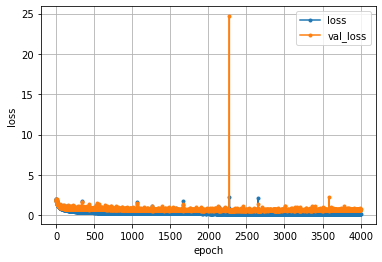

In [8]:
# 学習経過の可視化(大きさ)
loss     = size_history.history['loss']
val_loss = size_history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
#大きさごとの推定精度の確認：20%以下
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.2):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.4):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.6):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.8):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 1):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.7962962962962963
大きさ2の正答率：0.192
大きさ3の正答率：0.8598130841121495
大きさ4の正答率：0.8
大きさ5の正答率：0.75


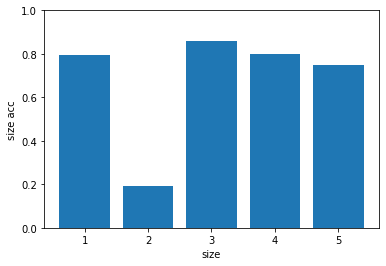

In [10]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [11]:
#大きさごとの推定精度の確認：最も近く予測
size_predict = cnn_size_model.predict([size_x_test1,size_x_test2,size_x_test3])
size_answer = size_y_test
one_total = 0
one_ok = 0
two_total = 0
two_ok = 0
three_total = 0
three_ok = 0
four_total = 0
four_ok = 0
five_total = 0
five_ok = 0
for i in range(len(size_predict)):
    if size_answer[i] == 1:
        one_total = one_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            one_ok = one_ok + 1
    if size_answer[i] == 2:
        two_total = two_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            two_ok = two_ok + 1
    if size_answer[i] == 3:
        three_total = three_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            three_ok = three_ok + 1
    if size_answer[i] == 4:
        four_total = four_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            four_ok = four_ok + 1
    if size_answer[i] == 5:
        five_total = five_total + 1
        if (abs(size_predict[i] - size_answer[i]) < 0.5):
            five_ok = five_ok + 1
print("大きさ1の正答率："+str(one_ok/one_total))
print("大きさ2の正答率："+str(two_ok/two_total))
print("大きさ3の正答率："+str(three_ok/three_total))
print("大きさ4の正答率："+str(four_ok/four_total))
print("大きさ5の正答率："+str(five_ok/five_total))

大きさ1の正答率：0.9351851851851852
大きさ2の正答率：0.312
大きさ3の正答率：0.822429906542056
大きさ4の正答率：0.5684210526315789
大きさ5の正答率：0.4230769230769231


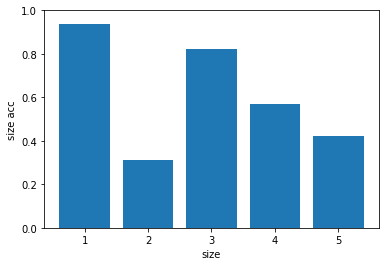

In [12]:
import numpy as np
import matplotlib.pyplot as plt
left = np.array([1,2,3,4,5])
height = np.array([one_ok/one_total,two_ok/two_total,three_ok/three_total,four_ok/four_total,five_ok/five_total])
plt.bar(left, height)
plt.xlabel("size")
plt.ylabel("size acc")
plt.ylim(top=1, bottom=0)
plt.show()

In [ ]:
1